# Hello world example on 2-qubit Bell state.

## Step 1: Map the problem to circuits and operators

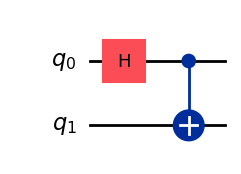

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')

In [ ]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')

observation = [ZZ, ZI, IZ]

## Step 2: Optimize

## Step 3: Execute on the backend
Remember to install qiskit_aer and verytime install new packages, remember to restart the kernel

In [5]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()
job = estimator.run([qc] * len(observation), observation)
job.result()

EstimatorResult(values=array([1.        , 0.00390625, 0.00390625]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000358375, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.002828708, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 8192, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9999847412109375, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000358375, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.002828708,

## Step 4: Post-process and plotting    

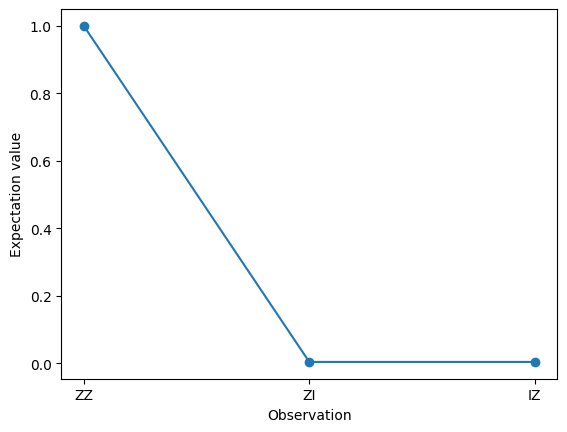

In [6]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ']
values = job.result().values
plt.plot(data, values, '-o')
plt.xlabel('Observation')
plt.ylabel('Expectation value')
plt.show()

## Extend the example to an n-qubit GHZ state

## Step1: Map the problem to circuits and operators^

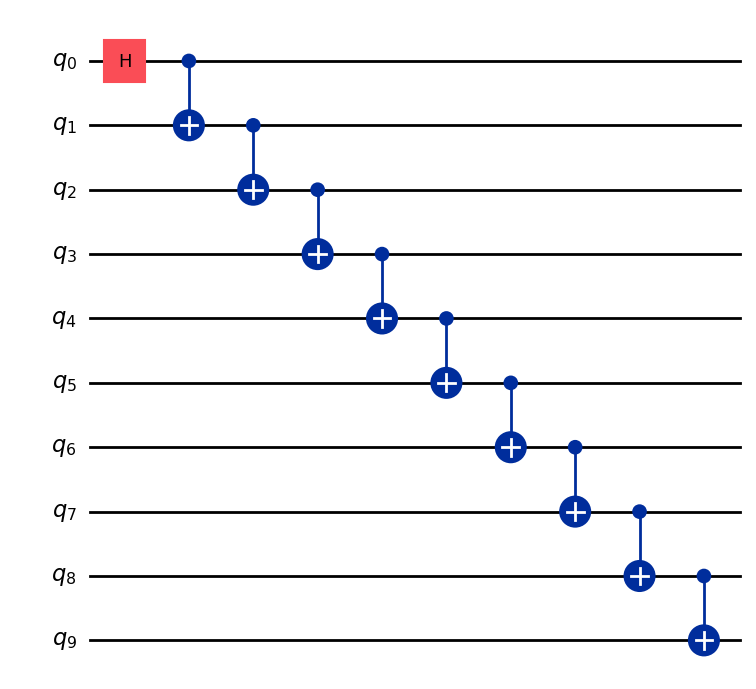

In [7]:
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 10
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

In [8]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I' * (n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_strings) for operator_string in operator_strings]

['ZZIIIIIIII', 'ZIZIIIIIII', 'ZIIZIIIIII', 'ZIIIZIIIII', 'ZIIIIZIIII', 'ZIIIIIZIII', 'ZIIIIIIZII', 'ZIIIIIIIZI', 'ZIIIIIIIIZ']
9


## Step 2: Optimize the problem for quantum execution

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

service = QiskitRuntimeService()
backend_name = 'ibm_brisbane'
backend = service.backend(backend_name)
pass_Manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_Manager.run(qc)
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]


## Step 3: Execute on the backend

In [ ]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1
options.optimization_level = 0
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = 'XY4'

estimator = Estimator(backend, options=options)
job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)

ValidationError: 1 validation error for EstimatorOptions
optimization_level
  Object has no attribute 'optimization_level' [type=no_such_attribute, input_value=0, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/no_such_attribute

## Step 4: Post-process and plot

In [ ]:
job_id = ' '
job = QiskitRuntimeService().job(job_id)


IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [ ]:
import matplotlib.pyplot as plt

data = list(range(1, len(operators)+1))
result = job.result()[0]
values = result.data.evs 
values = [v / values[0] for v in values]

plt.scatter(data, values, marker='o', label='100-qubit GHZ state')
plt.xlabel("Distance between qubits $i$")
plt.ylabel(r'\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$')
plt.legend()
plt.show()